In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [1]:
data_path = "online_shoppers_intention.csv"

In [22]:
df = pd.read_csv(data_path)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [23]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [24]:
df.OperatingSystems.unique()


array([1, 2, 4, 3, 7, 6, 8, 5])

In [7]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [25]:
df.shape

(12330, 18)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [27]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [28]:
data = df.copy()

In [29]:
#Conversion to Numerical format
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

In [30]:
# Assigning numbers to Months
temp_data = data.copy()
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
temp_data['Month']=temp_data['Month'].map(month_map)

#Assigning numbers to Visitor Type
vistor_map={'New_Visitor':0,'Returning_Visitor':1,'Other':2}
temp_data['VisitorType']=temp_data['VisitorType'].map(vistor_map)
temp_data['Weekend'] = temp_data['Weekend'].astype(int)

<AxesSubplot:>

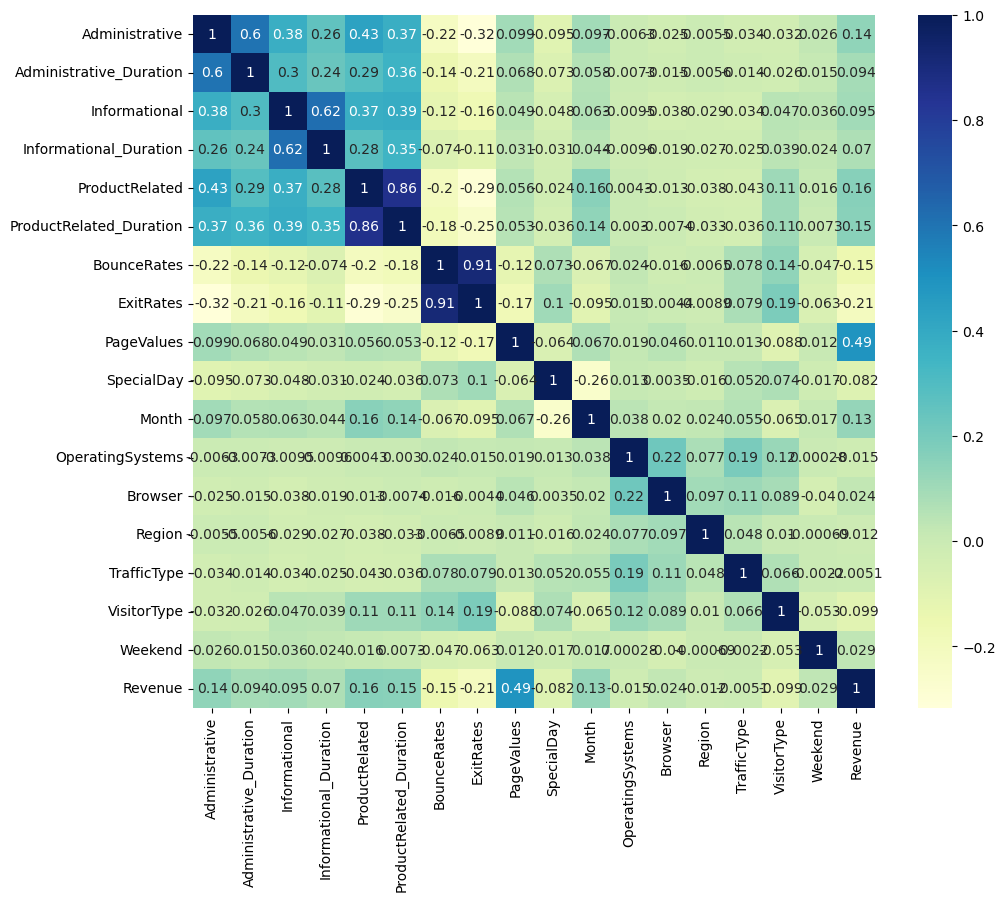

In [31]:
# Correlations between features.

correlations=temp_data.corr()
correlations

plt.figure(figsize=(11,9))
sns.heatmap(correlations,xticklabels=correlations.columns,
            yticklabels=correlations.columns,annot=True, cmap="YlGnBu")

In [32]:
df1=data[['PageValues','ExitRates','BounceRates','Revenue']]

Revenue
0    [[AxesSubplot(0.125,0.545217;0.336957x0.334783...
1    [[AxesSubplot(0.125,0.545217;0.336957x0.334783...
dtype: object

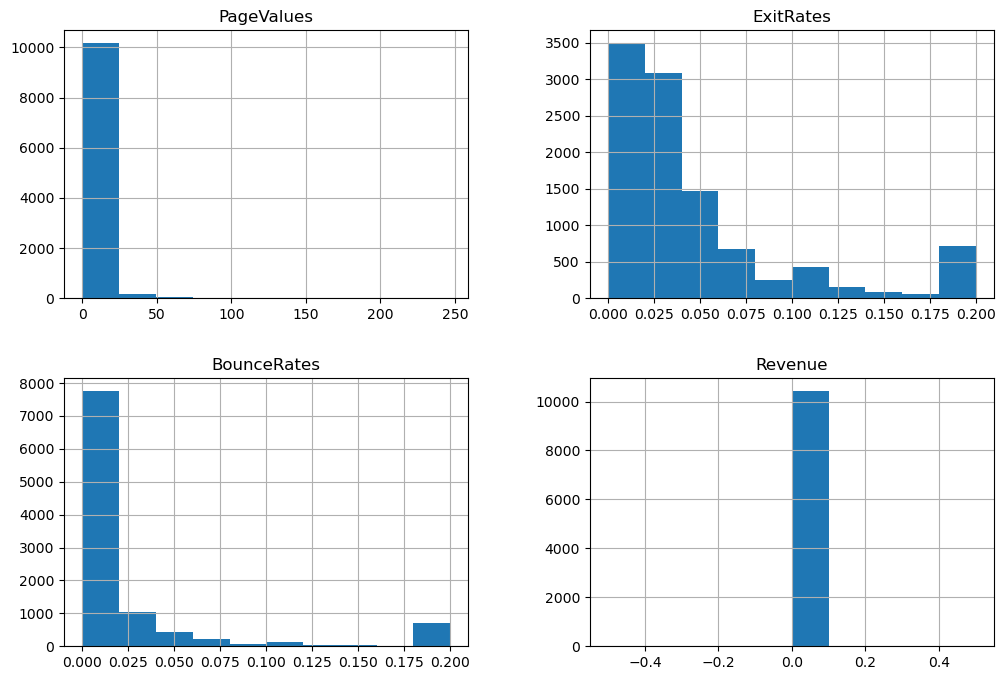

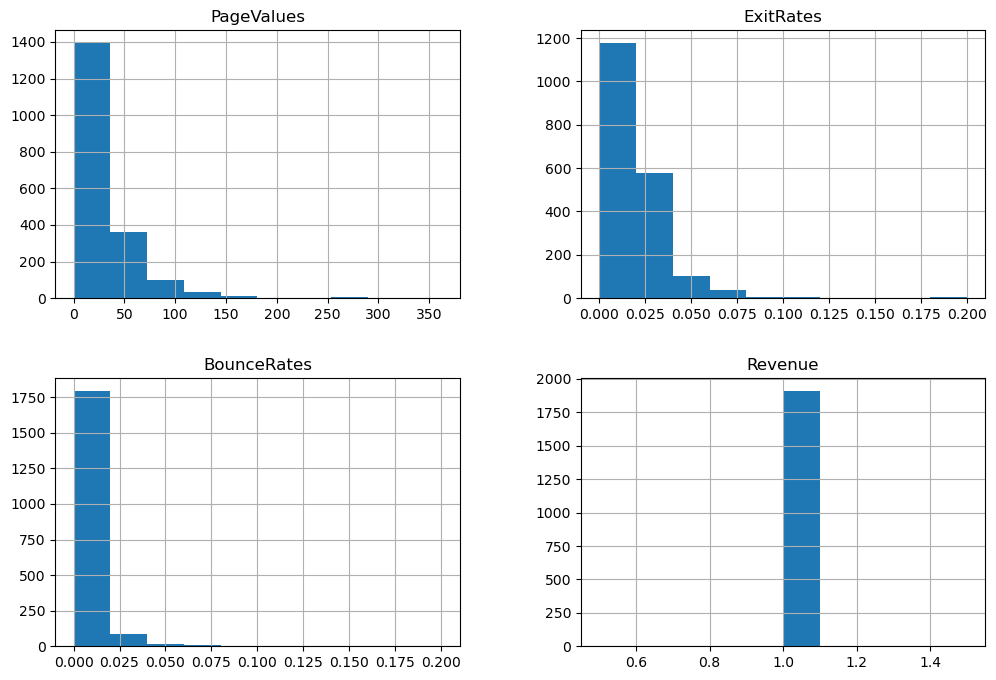

In [33]:
df1.groupby('Revenue').hist(figsize=(12,8))

In [34]:
s=temp_data[temp_data["Revenue"]==1]
s=s["Month"]

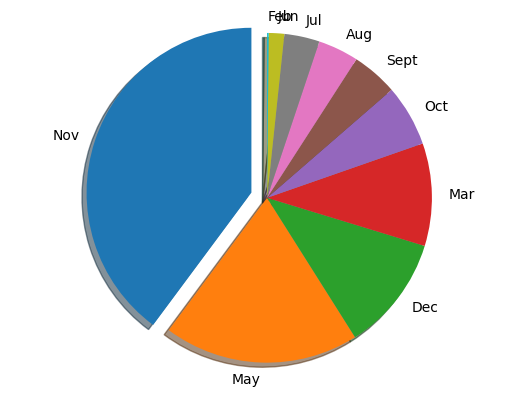

In [35]:
Months= 'Nov','May','Dec','Mar','Oct','Sept','Aug','Jul','Jun','Feb'
fig1,ax1=plt.subplots()
explode=(0.1,0,0,0,0,0,0,0,0,0)
ax1.pie(s.value_counts(),explode=explode,labels= Months,shadow=True,startangle=90)
ax1.axis('equal')
plt.show()

In [36]:
temp_data.Weekend.unique()

array([0, 1])

In [37]:
d=temp_data[temp_data["Revenue"]==1]
d=d["Weekend"]
d.value_counts()

0    1409
1     499
Name: Weekend, dtype: int64

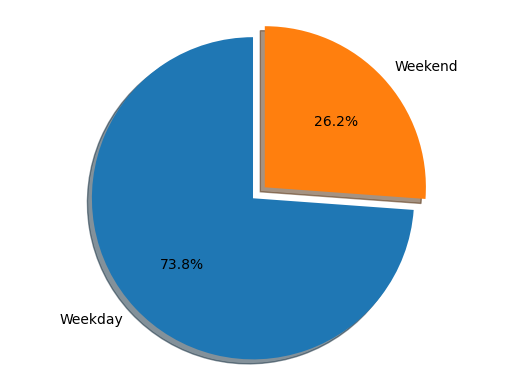

In [38]:
Day= "Weekday","Weekend"
fig1,ax1=plt.subplots()
explode=(0.1,0)
ax1.pie(d.value_counts(),explode=explode,labels= Day, autopct='%1.1f%%', shadow=True,startangle=90)
ax1.axis('equal')
plt.show()